# Assignment: Data Wrangling and Exploratory Data Analysis
## Do Q1 and Q2, and one other question.
`! git clone https://www.github.com/DS3001/assignment2`

**Q1.** Open the "tidy_data.pdf" document in the repo, which is a paper called Tidy Data by Hadley Wickham.

  1. Read the abstract. What is this paper about?
  2. Read the introduction. What is the "tidy data standard" intended to accomplish?
  3. Read the intro to section 2. What does this sentence mean: "Like families, tidy datasets are all alike but every messy dataset is messy in its own way." What does this sentence mean: "For a given dataset, it’s usually easy to figure out what are observations and what are variables, but it is surprisingly difficult to precisely define variables and observations in general."
  4. Read Section 2.2. How does Wickham define values, variables, and observations?
  5. How is "Tidy Data" defined in section 2.3?
  6. Read the intro to Section 3 and Section 3.1. What are the 5 most common problems with messy datasets? Why are the data in Table 4 messy? What is "melting" a dataset?
  7. Why, specifically, is table 11 messy but table 12 tidy and "molten"?
  8. Read Section 6. What is the "chicken-and-egg" problem with focusing on tidy data? What does Wickham hope happens in the future with further work on the subject of data wrangling?

**Q1 Answers**

**1.** The paper is about data cleaning. More specifically, Wickham argues that data tidying is one of the easier ways to take messy datasets to be ready for manipulation, modeling, visualization, and analysis. The data tidying structure goes as such: "each varaible is a column, each observation is a row, and each type of observational unit is a table." (Wickham 1)

**2.** The "tidy data standard" intends to accomplish a systematic and consistent way to organize data, prior to analysis. This is not only helpful for the one conducting the analysis, but also ensuring that the data cleaning process can be replicated for future projects/researchers/data scientist.

**3.** For the first sentence, it means that because tiny data sets are systematically cleaned in the same fashion, they have the commonality that makes them easy to follow with the same structure. Messy datasets are messy in their own way because they have each an unique way in which the data was recorded, errors, etc. and therefore have their own idiosyncrasies that are hard to follow. For the second sentence, Wickman means that while you can define the variables and observations, it is hard to figure out in what ways you want to comapre these/assign these in a comprehensible/logicial way. For example, Wickman is saying it can be hard to know where to put these variables and observations: make them the columns or rows. He then says: "A general rule of thumb is that it is easier to describe functional relationships between variables (e.g., z is a linear combination of x and y, density is the ration of weight to volume) than between rows, and it is easier to make comparsion between groups of observations (e.g., average of group a vs. average of group b) than between group of columns." (Wickman 4)

**4.** Wickman defines "values" as being either numbers (quantitative) or strings (qualitative) that are then organized in two ways. A "variable" then is something that "contains all values that measure te same underlying attribute (like height, temperature, duration) across units." (Wickman 4) Lastly, Wickman defines "observation" as such: "An observation contains all values measured on the same unit (like a person, or a day, or a race) across attributes." (4)

**5.** Wickman defines tiny data as such: "1. Each variable forms a column. \n 2. Each observation forms a row. \n 3. Each type of obeservational unit forms a table." (4)

**6.** The 5 most common problem with messy datasets are 1. "Column headers are values, not variable names.", 2. "Multiple variables are stored in one column.", 3. "Variables are stored in both rows and columns.", 4. "Multiple types of observational units are sotred in the same table.", and 5. "A single observational unit is stored in multiple tables." (Wickman 5). Table 4 is messy because it has three variables, religion, income, and frequency, with the column header is a value and not a variable name. Therefore, the data needs to be "melted," which is when one take sthe columns and turns them into rows. This is done by making "a list of columns that are already variables (colvars) and then making the other columns and making two variables: a new araible called column that contains repreated column headings and a new variable called value that contains the concatenated data valeus from the previously seperated columns." (Wickman 6) It is like taking "height" and "weight" columns and making one "variable" column that then has the either "height" or "variable" as the categorical values under that "variable" column, with then a "value" column to the right that denotes the actual value of the corresponding variable.

**7.** Table 11 is messy because the colvars, id, year, and month, are all seperated into different columns, as well as containing a lot of missing values that take a lot of space in the table that can be cleaned up. Table 12(a) therefore is molten because it took the three variables that denoted time, year, month, and dx (dx = date one, or first day of month, etc.), and made a date column, with each row having a recorded data recorded. Then the element has either the tmax or tmin, with then the right corresponding column as the "value" for that corresponding element. Table 12(b) makes it "tiny" because "Each row represents the meteorological measurements for a single day. There are two measured variables, minimum (tmin) and maximum (tmax) tempature: all other varialbes are fixed." (Wickman 11). 

**8.** The chicken-and-egg progems is "if tidy data is only as useful as the tools that work with it, then tidy tools will be inextricably linked to tidy data." (Wickman 20) Essentially it can cause one "to get stuck in a local maxima where independently changing data structures or data tools will not imporove workflow." (Wickman 20) Wickman therefore hopes that future developers/statisticans/whoever can "build on this framework to develop even better data storage strategies and better tools." (22) 

**Q2.** This question provides some practice cleaning variables which have common problems.
1. Numeric variable: For `./data/airbnb_hw.csv`, clean the `Price` variable as well as you can, and explain the choices you make. How many missing values do you end up with? (Hint: What happens to the formatting when a price goes over 999 dollars, say from 675 to 1,112?)
2. Categorical variable: For the `./data/sharks.csv` data covered in the lecture, clean the "Type" variable as well as you can, and explain the choices you make.
3. Dummy variable: For the pretrial data covered in the lecture, clean the `WhetherDefendantWasReleasedPretrial` variable as well as you can, and, in particular, replace missing values with `np.nan`.
4. Missing values, not at random: For the pretrial data covered in the lecture, clean the `ImposedSentenceAllChargeInContactEvent` variable as well as you can, and explain the choices you make. (Hint: Look at the `SentenceTypeAllChargesAtConvictionInContactEvent` variable.)

In [2]:
import numpy as np
import pandas as pd

In [3]:
! git clone https://www.github.com/DS3001/assignment2

Cloning into 'assignment2'...
remote: Enumerating objects: 36, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 36 (delta 8), reused 5 (delta 5), pack-reused 24
Unpacking objects: 100% (36/36), done.


In [5]:
df = pd.read_csv('assignment2/data/airbnb_hw.csv', low_memory=False)

In [6]:
df.head()

,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
0,5162530,NaN,1 Bedroom in Prime Williamsburg,Brooklyn,Apartment,NaN,Entire home/apt,11249.0,1.0,1,0,145,NaN
1,33134899,NaN,"Sunny, Private room in Bushwick",Brooklyn,Apartment,NaN,Private room,11206.0,1.0,1,1,37,NaN
2,39608626,NaN,Sunny Room in Harlem,Manhattan,Apartment,NaN,Private room,10032.0,1.0,1,1,28,NaN
3,500,6/26/2008,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,NaN,Entire home/apt,10024.0,3.0,1,0,199,NaN
4,500,6/26/2008,Trendy Times Square Loft,Manhattan,Apartment,95.0,Private room,10036.0,3.0,1,39,549,96.0


In [7]:
df['Price'].str.replace(',','') # Take out the commas

0        145
1         37
2         28
3        199
4        549
        ... 
30473    300
30474    125
30475     80
30476     35
30477     80
Name: Price, Length: 30478, dtype: object

<Axes: >

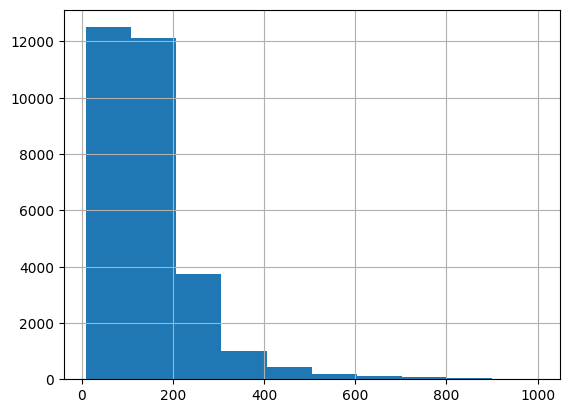

In [8]:
df['Price'] = pd.to_numeric(df['Price'], errors='coerce') # Make Price numeric
df['Price'].hist() # Displays Price and makes sure it is numeric

In [9]:
x= df['Price'].count() # Total values
y= df['Price'].isna().sum() # Missing values
print("There are " + str(x) + " total values in the Price category" "\n" + "There are " + str(y) + " missing values in the Price category")

There are 30297 total values in the Price category
There are 181 missing values in the Price category


**Question 2, Part 1**

I first took out the commas in the price values, still keeping it a string. I then changed the price values from a string to a numerical value, in which it would either be a integer or a float. I then took the price column and displayed it as a histogram to make sure that the values had changed to numbers and to see it visually. I then took compared the total values in the price column to that of the missing values, using the count() and .isna().sum() functions.

In [10]:
sdf = pd.read_csv('assignment2/data/sharks.csv', low_memory=False) #shark data
sdf.head()

,index,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,...,Unnamed: 246,Unnamed: 247,Unnamed: 248,Unnamed: 249,Unnamed: 250,Unnamed: 251,Unnamed: 252,Unnamed: 253,Unnamed: 254,Unnamed: 255
0,0,2020.02.05,05-Feb-2020,2020.0,Unprovoked,USA,Maui,NaN,Stand-Up Paddle boarding,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2020.01.30.R,Reported 30-Jan-2020,2020.0,Provoked,BAHAMAS,Exumas,NaN,Floating,Ana Bruna Avila,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2020.01.17,17-Jan-2020,2020.0,Unprovoked,AUSTRALIA,New South Wales,Windang Beach,Surfing,Will Schroeter,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,2020.01.16,16-Jan-2020,2020.0,Unprovoked,NEW ZEALAND,Southland,Oreti Beach,Surfing,Jordan King,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,2020.01.13,13-Jan-2020,2020.0,Unprovoked,USA,North Carolina,"Rodanthe, Dare County",Surfing,Samuel Horne,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
var = 'Type'
print(sdf[var].unique(), '\n') # Looking at the categories
sdf[var] = sdf[var].replace(' ',np.nan) # Column replacement
print(sdf[var].value_counts(), '\n') # Count of values in each category

['Unprovoked' 'Provoked' 'Questionable' 'Watercraft' 'Unconfirmed'
 'Unverified' 'Invalid' 'Under investigation' 'Boating' 'Sea Disaster' nan
 'Boat' 'Boatomg'] 

Unprovoked             4716
Provoked                593
Invalid                 552
Sea Disaster            239
Watercraft              142
Boat                    109
Boating                  92
Questionable             10
Unconfirmed               1
Unverified                1
Under investigation       1
Boatomg                   1
Name: Type, dtype: int64 



In [15]:
type_dict= {
    'Unprovoked': 'Unprovoked',
    'Provoked' : 'Provoked',
    'Invalid' : 'Unverified',
    'Sea Disaster' : 'Sea Disaster',
    'Watercraft' : 'Watercraft',
    'Boat' : 'Watercraft',
    'Boating' : 'Watercraft',
    'Questionable' : 'Unverified',
    'Unconfirmed' : 'Unverified',
    'Unverified' : 'Unverified',
    'Under investigation' : 'Unverified',
    'Boatomg' : 'Watercraft'
}
sdf['Type'] = sdf['Type'].replace(type_dict) #ChatGPT helped with me with creating a dictionary and map the categories to replace them with these categories I made.
print(sdf['Type'])


0       Unprovoked
1         Provoked
2       Unprovoked
3       Unprovoked
4       Unprovoked
           ...    
6457    Unprovoked
6458    Unprovoked
6459    Unprovoked
6460    Unprovoked
6461    Unprovoked
Name: Type, Length: 6462, dtype: object


**For Question 2. Part 2**

I chose "Unprovoked", "Provoked", "Unverified", "Sea Disaster", and "Watercraft"
as the new categories. Unprovoked and provoked remained because they made the
most sense to keep since their quantity was higher and they seem of the same type.
Unverified was an overarching category to describe all the types that seemed
questionable/speculative in nature. Sea Disaster felt like its own category,
since it doesn't denote fully it was unprovoked/provoked, and I thought it
didn't fit in any of the other categories. Lastly, watercraft denotes all the
type categories that were explaining the event occured in a the context of a
water vehicle. I include 'Boatomg' (boat, omg!) in the watercraft category,
presuming they meant 'boating,' but I can understand if one doesn't interpret
it that way.

In [4]:
url = 'http://www.vcsc.virginia.gov/pretrialdataproject/October%202017%20Cohort_Virginia%20Pretrial%20Data%20Project_Deidentified%20FINAL%20Update_10272021.csv'
tdf = pd.read_csv(url,low_memory=False) # trial data

In [17]:
tdf['released'] = tdf['WhetherDefendantWasReleasedPretrial']
var = 'released'
print(tdf[var].unique(), '\n')
tdf[var] = tdf[var].replace( [9,99], np.nan) # Notice the list
print(tdf[var].value_counts()) # A Dummy Example
tdf['released'] = tdf['released'].replace({None: np.nan}) # Replaces missing values with np.nan

[9 0 1] 

1.0    19154
0.0     3801
Name: released, dtype: int64
0         True
1        False
2        False
3        False
4        False
         ...  
22981    False
22982    False
22983    False
22984    False
22985    False
Name: released, Length: 22986, dtype: bool


In [46]:
tdf['sent_length'] = tdf['ImposedSentenceAllChargeInContactEvent'].replace({' ': None}) # Replaces space with None
tdf['sent_length_NA'] = tdf['sent_length'].isnull()
#print(tdf['SentenceTypeAllChargesAtConvictionInContactEvent'].isnull().unique())
print(pd.crosstab(tdf['sent_length_NA'],tdf['SentenceTypeAllChargesAtConvictionInContactEvent']),'\n')

SentenceTypeAllChargesAtConvictionInContactEvent     0     1    2     4    9
sent_length_NA                                                              
False                                             8720  4299  914     0    0
True                                                 0     0    0  8779  274 



There's missing data for types 4 and 9, but not for 0, 1, or 2.

In [49]:
tdf.loc[ tdf['SentenceTypeAllChargesAtConvictionInContactEvent'] == 4, 'sent_length'] = 0 # Missing
x = tdf.loc[ tdf['SentenceTypeAllChargesAtConvictionInContactEvent'] == 9, 'sent_length'] = np.nan

#print(tdf['sent_length'].hist(), '\n')
#print(tdf['ImposedSentenceAllChargeInContactEvent'].describe(), '\n')
tdf['sent_length_NA2'] = tdf['sent_length'].isnull()
print(pd.crosstab(tdf['sent_length_NA2'],tdf['SentenceTypeAllChargesAtConvictionInContactEvent']),'\n')

SentenceTypeAllChargesAtConvictionInContactEvent     0     1    2     4    9
sent_length_NA2                                                             
False                                             8720  4299  914  8779  274 



In [ ]:
tdf = tdf[tdf['SentenceTypeAllChargesAtConvictionInContactEvent'] != 9]
print(tdf['SentenceTypeAllChargesAtConvictionInContactEvent'].unique()) # no 9s
tdf = tdf[tdf['SentenceTypeAllChargesAtConvictionInContactEvent'] != 4]
print(tdf['SentenceTypeAllChargesAtConvictionInContactEvent'].unique()) #no 4s

I chose to get rid of the categories 4 and 9 since they don't provide data that is reliable, since the sentence length is unknown. It is my opinion to not guess it since it could be then making the analysis/results represent something actually different from what is observed.

**Q3.** This question provides some practice doing exploratory data analysis and visualization.

The "relevant" variables for this question are:
  - `level` - Level of institution (4-year, 2-year)
  - `aid_value` - The average amount of student aid going to undergraduate recipients
  - `control` - Public, Private not-for-profit, Private for-profit
  - `grad_100_value` - percentage of first-time, full-time, degree-seeking undergraduates who complete a degree or certificate program within 100 percent of expected time (bachelor's-seeking group at 4-year institutions)

1. Load the `./data/college_completion.csv` data with Pandas.
2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
3. Cross tabulate `control` and `level`. Describe the patterns you see.
4. For `grad_100_value`, create a histogram, kernel density plot, boxplot, and statistical description.
5. For `grad_100_value`, create a grouped kernel density plot by `control` and by `level`. Describe what you see. Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `grad_100_value` by `level` and `control`. Which institutions appear to have the best graduation rates?
6. Create a new variable, `df['levelXcontrol']=df['level']+', '+df['control']` that interacts level and control. Make a grouped kernel density plot. Which institutions appear to have the best graduation rates?
7. Make a kernel density plot of `aid_value`. Notice that your graph is "bi-modal", having two little peaks that represent locally most common values. Now group your graph by `level` and `control`. What explains the bi-modal nature of the graph? Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `aid_value` by `level` and `control`.
8. Make a scatterplot of `grad_100_value` by `aid_value`. Describe what you see. Now make the same plot, grouping by `level` and then `control`. Describe what you see. For which kinds of institutions does aid seem to increase graduation rates?

**Q4.** This question uses the Airbnb data to practice making visualizations.

  1. Load the `./data/airbnb_hw.csv` data with Pandas. You should have cleaned the `Price` variable in question 2, and you'll need it later for this question.
  2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
  3. Cross tabulate `Room Type` and `Property Type`. What patterns do you see in what kinds of rentals are available? For which kinds of properties are private rooms more common than renting the entire property?
  4. For `Price`, make a histogram, kernel density, box plot, and a statistical description of the variable. Are the data badly scaled? Are there many outliers? Use `log` to transform price into a new variable, `price_log`, and take these steps again.
  5. Make a scatterplot of `price_log` and `Beds`. Describe what you see. Use `.groupby()` to compute a desciption of `Price` conditional on/grouped by the number of beds. Describe any patterns you see in the average price and standard deviation in prices.
  6. Make a scatterplot of `price_log` and `Beds`, but color the graph by `Room Type` and `Property Type`. What patterns do you see? Compute a description of `Price` conditional on `Room Type` and `Property Type`. Which Room Type and Property Type have the highest prices on average? Which have the highest standard deviation? Does the mean or median appear to be a more reliable estimate of central tendency, and explain why?
  7. We've looked a bit at this `price_log` and `Beds` scatterplot. Use seaborn to make a `jointplot` with `kind=hex`. Where are the data actually distributed? How does it affect the way you think about the plots in 5 and 6?

**Q5.** Many important datasets contain a race variable, typically limited to a handful of values often including Black, White, Asian, Latino, and Indigenous. This question looks at data gathering efforts on this variable by the U.S. Federal government.

1. How did the most recent US Census gather data on race?
2. Why do we gather these data? What role do these kinds of data play in politics and society? Why does data quality matter?
3. Please provide a constructive criticism of how the Census was conducted: What was done well? What do you think was missing? How should future large scale surveys be adjusted to best reflect the diversity of the population? Could some of the Census' good practices be adopted more widely to gather richer and more useful data?
4. How did the Census gather data on sex and gender? Please provide a similar constructive criticism of their practices.
5. When it comes to cleaning data, what concerns do you have about protected characteristics like sex, gender, sexual identity, or race? What challenges can you imagine arising when there are missing values? What good or bad practices might people adopt, and why?
6. Suppose someone invented an algorithm to impute values for protected characteristics like race, gender, sex, or sexuality. What kinds of concerns would you have?

**Q5 Answers**

**1.** The 2020 US Census gathered data on race by 6 categories: White, Black or African American, American Indian or Alaskan Native, Asian, Native Hawaiian or Other Pacific Islander, and lastly Some Other Race (for people who do not identify with any of the OMB race categoies." (https://www.census.gov/newsroom/blogs/random-samplings/2021/08/measuring-racial-ethnic-diversity-2020-census.html) These data were self-reported and an individual was able to chose from any of these 6 categories. 

**2.** We collect these data because it helps for the government to understand the demographic makeup of the country to help in particular with civil rights, racial descrimination, hate crime data, criminal data, etc. Race in the U.S. is also a particular salient identity, and it has been a topic of many of legislation including but not limited to: education inequality, income inequality, crime, etc. Therefore, the quality of the data really matters in order to make correct policy decisions and helping correct stakeholders in society to make decisions, including education accessibility, hiring, racial diversity in neighborhoods, etc. If this race data's quality is poor, this can have negative affects on policy decisions and those who make decisions in the private sector, such as executives or even hiring managers, as information acquisition is an important part of decision making.

**3.** In terms of what was done well, I think that they tried to include some understanding of complexity on the racial categorization with the Some Other Race. I think that they also at least had some different categories of race. It seems that they  I think that one of the biggest categories that could be adjusted was the Asian one. Asia is an extremely diverse continent as well as makes up a large part of the entire world's population, and so I think it is not able to capture this diversity/complexity by just having Asian. Perhaps it can be categories as "Southeast Asian", "East Asian", and "Western Asia" (this being the Middle East), "North Asia", etc. By breaking up in this way, it can better capture, I think, the complexity and diversity of this Asian racial category. I think a further description of then what all these different categories with perhaps even a map and of course input from those who identify as these different races can help researchers have a better, richer understanding of their measurement of race. Hopefully, a restructuring of this data collection can be implemented and adopted by other research/data collection, to help capture and understand the world better. 

**4.** The Census gathered data on sex by having a checkbox that gave the person two options: Male or Female, in which they can check one. In terms of gender, there was no data collected on this metric. I think that this could be improved by creating another question and then having gender as a selection, which could include things like nonbinary, transgender, genderfluid, gender non-conforming, woman, man, etc. Moreover, for the sex category, an intersex category could be included to get information on the sex makeup of the US.  

**5.** When it comes to cleaning data, one concern I might have is that there could be a lot of data that is either left empty or filled out incorrectly, mostly to people being unsure about how to fill out these characteristics, or might accidently check something they might not actually identify with. I think it is easier to probably clean data with less racial/sex/gender/etc. categories, which might be a reason may researchers try to limit categories, but might miscalculate the severity of this data-collection decision. When there are missing values, I could forsee data getting ommited, which might actually be problematic for understanding the true makeup of a population. A bad practice therefore that might occur is that they just get rid of these categories or underestimate their impact on what they are trying to understand, which can affect their findings and the residual impacts of their research (policy, etc.) A good practice might to try to best explain and outline what these categories are in the survey for those being surveyed and then trying to not omit these categories when clean data as much as possible.  

**6.** I would have some concerns about the accuracy of the data that was recorded, as those who would fill out these surveys could incorrectly put down their correct identification. Moreover, because minorities within these categories make up less of the population, my concern is that the algorithm might not include enough representation in whatever is being predicted. I could see that a model, like using race as a category and predicting the likelihood of getting a particular diagnosis for example, could be problematic since some racial groups might have different health concerns or risks, such as African Americans and the likelihood of having sickle cell disease. 

**Q6.** Open the `./data/CBO_data.pdf` file. This contains tax data for 2019, explaining where the money comes from that the U.S. Federal Government Spends in terms of taxation on individuals/families and payroll taxes (the amount that your employer pays in taxes on your wages).

For some context, the Federal government ultimately spent about $4.4 trillion in 2019, which was 21% of GDP (the total monetary value of all goods and services produced within the United States). Individual Income Taxes is the amount individuals pay on their wages to the Federal government, Corporate Income Taxes is the taxes individuals pay on capital gains from investment when they sell stock or other financial instruments, Payroll Taxes is the tax your employer pays on your wages, Excises and Customs Duties are taxes on goods or services like sin taxes on cigarettes or alcohol, and Estate and Gift Taxes are taxes paid on transfers of wealth to other people.

1. Get the Millions of Families and Billions of Dollars data into a .csv file and load it with Pandas.
2. Create a bar plot of individual income taxes by income decile. Explain what the graph shows. Why are some values negative?
3. Create a bar plot of Total Federal Taxes by income decile. Which deciles are paying net positive amounts, and which are paying net negative amounts?
4. Create a stacked bar plot for which Total Federal Taxes is grouped by Individual Income Taxes, Payroll Taxes, Excises and Customs Duties, and Estate and Gift Taxes. How does the share of taxes paid vary across the adjusted income deciles? (Hint: Are these the kind of data you want to melt?)
5. Below the Total line for Millions of Families and Billions of Dollars, there are data for the richest of the richest families. Plot this alongside the bars for the deciles above the Total line. Describe your results.
6. Get the Percent Distribution data into a .csv file and load it with Pandas. Create a bar graph of Total Federal Taxes by income decile.
7. A tax system is progressive if higher-income and wealthier individuals pay more than lower-income and less wealthy individuals, and it is regressive if the opposite is true. Is the U.S. tax system progressive in terms of amount paid? In terms of the percentage of the overall total?
8. Do the rich pay enough in taxes? Defend your answer.